# Building a Recommender System from Scratch

### What is a recommender?

### How do you build a recommender?

#### Collaborative Filtering

#### Content-based filtering

### Step 1: Import Dependencies

- Representing our dataset as a `pandas` dataframe
- Represneting our user-item matrix as a `scipy.sparse.csr_matrix`
- Visualizing data with `matplotlib` and `seaborn` (a matplotlib wrapper)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Data

Let's download a small version of the MovieLens dataset. See here for zip file url, or directly download here. We're working with data in ml-latest-small.zip and will need to add the following files to our repository:

- ratings.csv
- movies.csv

Alternatively, you can access the data here:

- https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv
- https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv

In [2]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

In [4]:
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

### Step 3: Exploratory Data Analysis

In [6]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100004
Number of unique movieId's: 9066
Number of unique users: 671
Average number of ratings per user: 149.04
Average number of ratings per movie: 11.03


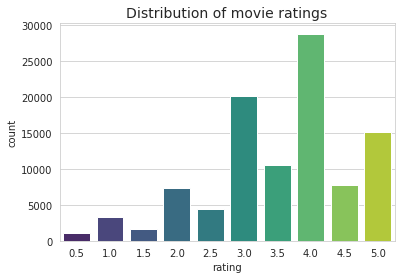

In [9]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

#### Best vs. Worst Movie

Which movie has the lowest and highest average rating?

In [10]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()

lowest_rated = mean_ratings['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]

,movieId,title,genres
1062,1311,Santa with Muscles (1996),Comedy


In [12]:
highest_rated = mean_ratings['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]

,movieId,title,genres
50,53,Lamerica (1994),Adventure|Drama


#### Bayesian Average

Bayesian Average is defined as:

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

where $C$ represents our confidence, $m$ represents our prior, and $N$ is the total number of reviews for movie $i$. In this case, our prior will be the average rating across all movies.

In [41]:
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()
movie_stats.sort_values('count', ascending=False)

,count,mean
movieId,,
356,341,4.054252
296,324,4.256173
318,311,4.487138
593,304,4.138158
260,291,4.221649
480,274,3.706204
2571,259,4.183398
1,247,3.872470
527,244,4.303279


In [16]:
lamerica_ratings = ratings[ratings['movieId']==highest_rated]
print(f"Number of Lamerica ratings: {len(lamerica_ratings)}")

Number of Lamerica ratings: 1


Lamerica may be the "highest" rated movie, but it only has one rating. A better approach for evaluating movie popularity is to do look at the [Bayesian average](https://en.wikipedia.org/wiki/Bayesian_average).

### Part 2: Top N recommender